# Crypto Style Analysis (NO Gold with Dow Jones and CMC crypto index) Presentation

Our purpose is to perform Style Analysis, as proposed by Sharpe, on the top cryptocurrencies by market capitalization. We will try to explain the daily returns of Binance to token (BNB-USD), Cardano (ADA-USD), DOGE coin (DOGE-USD), LITE coin (LTC-USD), Ripple coin (XRP-USD) and Solana (SOL-USD) based on the returns of Bitcoin (BTC-USD), Etherium (ETH-USD) as benchmarks. The time period used in this analysis is from 2020-04-11 to 2024-07-31. The data is obtained from Yahoo Finance concerning the daily returns for the mentioned period.

In [1]:
# Add the directory containing the functions to the system
import os
import sys
module_path = os.path.abspath(os.path.join('../crypto_style_analysis'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import itertools
from src.preprocess_data import create_dir
from src.download_data import download_data
from src.preprocess_data import crypto_series_to_process
from src.descriptive_statistics import descriptive_statistics_function
from src.data_analysis import create_adf_result_data_frame, find_non_stationary_series
from src.style_analysis import rolling_style_analysis

In [3]:
# Create the directory to save the data
base_dir = create_dir()
print(base_dir)

/Users/konstantinospapastamatiou/PycharmProjects/crypto_style_analysis/data


In [4]:
# Download Data
start_date = '2019-01-01'
end_date = '2024-08-12'
# Define the window size for the rolling analysis
window_size = 300
# Define the series to perform the rolling analysis against
rolling_window_against = ['log_return_BTC-USD', 'log_return_ETH-USD']
# Define the tickers to download
yahoo_tickers = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BNB-USD', 'DOGE-USD', 'ADA-USD', 'SOL-USD']
series = []
save_file = True
download_data(path=base_dir, tickers=yahoo_tickers, fred_tickers=series, from_date=start_date, to_date=end_date,
              save_csv=save_file)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424   
2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  3836.741211   
2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  3857.717529   
2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  3845.194580   

                Volume  
Date                    
2019-01-01  4324200990  
2019-01-02  5244856836  
2019-01-03  4530215219  
2019-01-04  4847965467  
2019-01-05  5137609824  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  133.418152  141.397507  132.650711  140.819412  140.819412   
2019-01-02  141.519516  156.929138  140.650955  1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2019-01-01  0.352512  0.364771  0.350402  0.364771   0.364771  449347622
2019-01-02  0.365675  0.378021  0.359574  0.375243   0.375243  543216669
2019-01-03  0.374505  0.374505  0.357675  0.360224   0.360224  438873803
2019-01-04  0.359753  0.364642  0.352785  0.356747   0.356747  450633876
2019-01-05  0.356347  0.361069  0.353987  0.355275   0.355275  452090239
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-01  30.458393  32.097584  30.264280  31.979931  31.979931  379429124
2019-01-02  32.021229  33.793324  31.765974  33.433681  33.433681  414331918
2019-01-03  33.353573  33.420704  31.592480  32.026699  32.026699  345068249
2019-01-04  32.016525  33.023350  31.437557  32.404167  32.404167  391010579
2019-01-05  32.345547  36.1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  6.191432  6.191929  5.885122  6.075273   6.075273  23891162
2019-01-02  6.091465  6.207873  5.949006  6.188613   6.188613  30308610
2019-01-03  6.171907  6.175116  5.901559  5.903535   5.903535  22821639
2019-01-04  5.895052  6.065898  5.863714  6.065138   6.065138  29311136
2019-01-05  6.055661  6.204376  6.034071  6.065543   6.065543  30340637
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  0.002346  0.002392  0.002322  0.002392   0.002392  17364744
2019-01-02  0.002388  0.002458  0.002372  0.002407   0.002407  18015392
2019-01-03  0.002404  0.002414  0.002356  0.002360   0.002360  17619234
2019-01-04  0.002364  0.002397  0.002274  0.002315   0.002315  19530100
2019-01-05  0.002320  0.002350  0.002280  0.002319   0.002319  1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  0.040984  0.042547  0.040308  0.042547   0.042547  14962902
2019-01-02  0.042568  0.045563  0.041982  0.045258   0.045258  24151526
2019-01-03  0.045106  0.045259  0.042535  0.042682   0.042682  21126963
2019-01-04  0.042629  0.044092  0.042477  0.043812   0.043812  16024029
2019-01-05  0.043659  0.045570  0.043350  0.044701   0.044701  25100965
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-04-10  0.832005  1.313487  0.694187  0.951054   0.951054  87364276
2020-04-11  0.951054  1.049073  0.765020  0.776819   0.776819  43862444
2020-04-12  0.785448  0.956670  0.762426  0.882507   0.882507  38736897
2020-04-13  0.890760  0.891603  0.773976  0.777832   0.777832  18211285
2020-04-14  0.777832  0.796472  0.628169  0.661925   0.661925  1

In [5]:
# Preprocess the data
start_date = '2019-01-03'
end_date = '2024-07-31'
preprocessed_df = crypto_series_to_process(path=base_dir, from_date=start_date, to_date=end_date, save=False, tickers=yahoo_tickers)
preprocessed_df.dropna(inplace=True)
preprocessed_df.reset_index(inplace=True, drop=True)
preprocessed_df.head()

,Date,LTC-USD,BNB-USD,SOL-USD,DOGE-USD,ADA-USD,XRP-USD,ETH-USD,BTC-USD,log_return_LTC-USD,log_return_BNB-USD,log_return_SOL-USD,log_return_DOGE-USD,log_return_ADA-USD,log_return_XRP-USD,log_return_ETH-USD,log_return_BTC-USD
0,2020-04-11,42.319099,13.804288,0.776819,0.001990,0.033354,0.188063,158.216019,6859.083008,0.001165,0.004834,-0.202363,0.011117,0.004176,0.003190,-0.001241,-0.000934
1,2020-04-12,42.450287,14.375111,0.882507,0.001990,0.033806,0.190135,161.142426,6971.091797,0.003095,0.040519,0.127559,0.000000,0.013461,0.010957,0.018327,0.016198
2,2020-04-13,41.204342,15.034427,0.777832,0.001959,0.033107,0.187732,156.279556,6845.037598,-0.029790,0.044844,-0.126256,-0.015701,-0.020894,-0.012719,-0.030642,-0.018248
3,2020-04-14,41.053841,15.525076,0.661925,0.001964,0.032974,0.185335,157.596390,6842.427734,-0.003659,0.032114,-0.161358,0.002549,-0.004025,-0.012850,0.008391,-0.000381
4,2020-04-15,39.589069,14.593927,0.646651,0.001940,0.031863,0.181270,153.286896,6642.109863,-0.036331,-0.061851,-0.023346,-0.012295,-0.034274,-0.022177,-0.027726,-0.029713


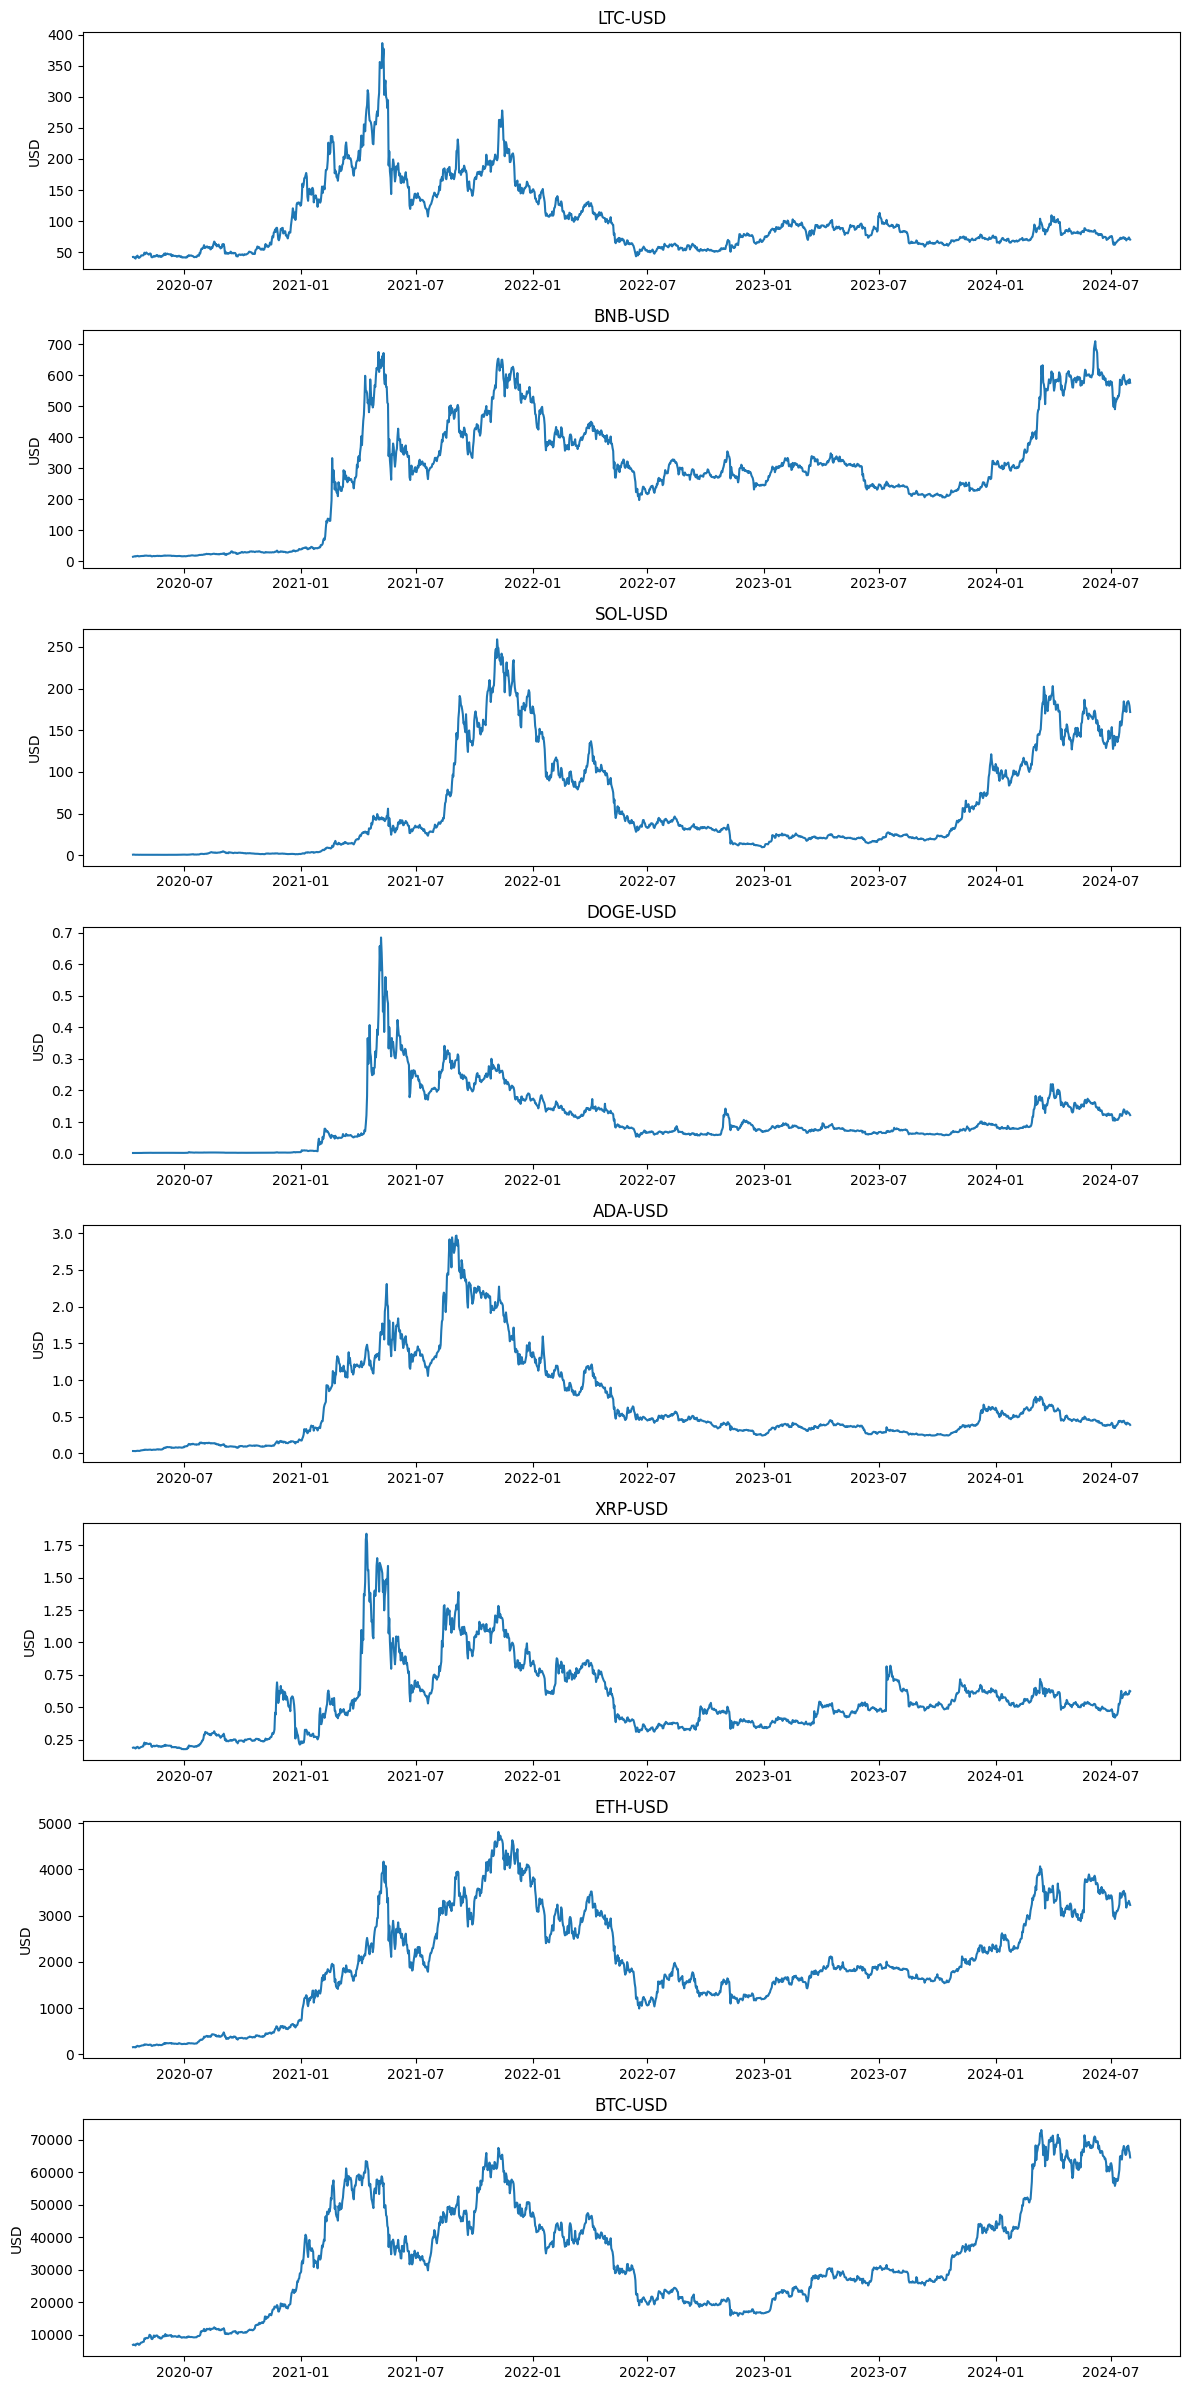

In [6]:
columns = preprocessed_df.loc[:, ~(preprocessed_df.columns.str.contains('log_return') | preprocessed_df.columns.str.contains('Date'))].columns
num_columns = len(columns)

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, 3*num_columns), sharex=True)

for i, col in enumerate(columns):
    axes[i].plot(preprocessed_df['Date'], preprocessed_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', which='both', labelbottom=True)
    axes[i].set_ylabel('USD')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Log Returns of the Time Series'}, xlabel='Date'>

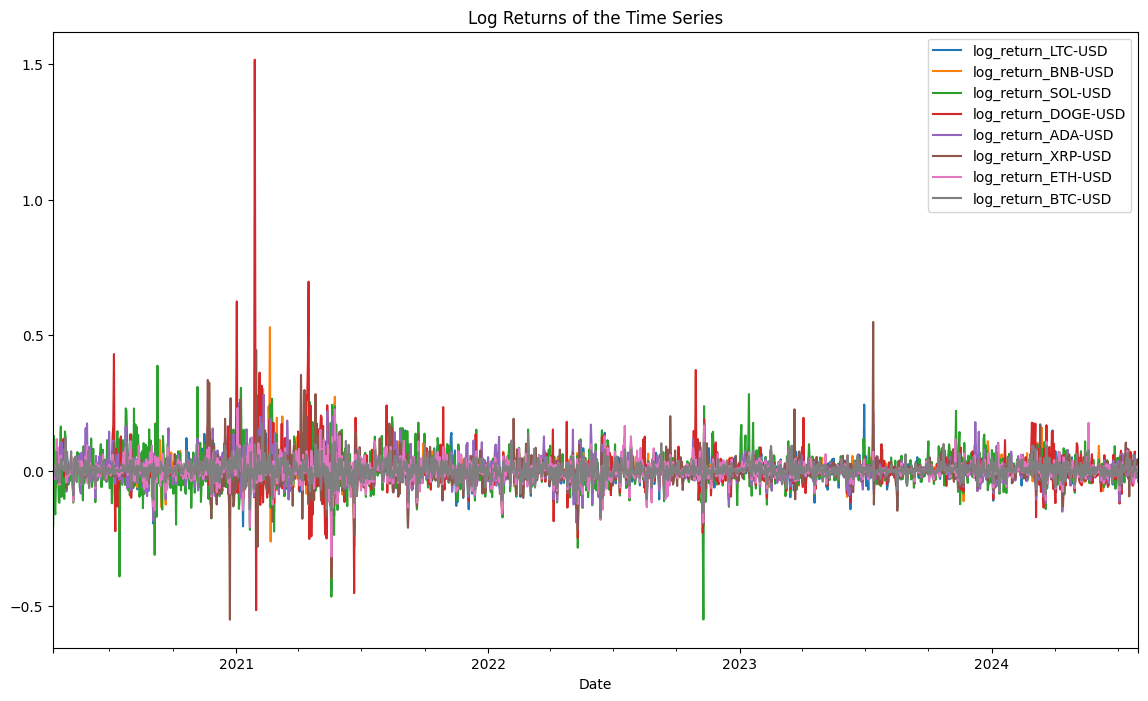

In [7]:
preprocessed_df.plot(x='Date', 
                     y=preprocessed_df.loc[:, preprocessed_df.columns.str.contains('log_return')].columns,
                     figsize=(14,8), 
                     title='Log Returns of the Time Series')

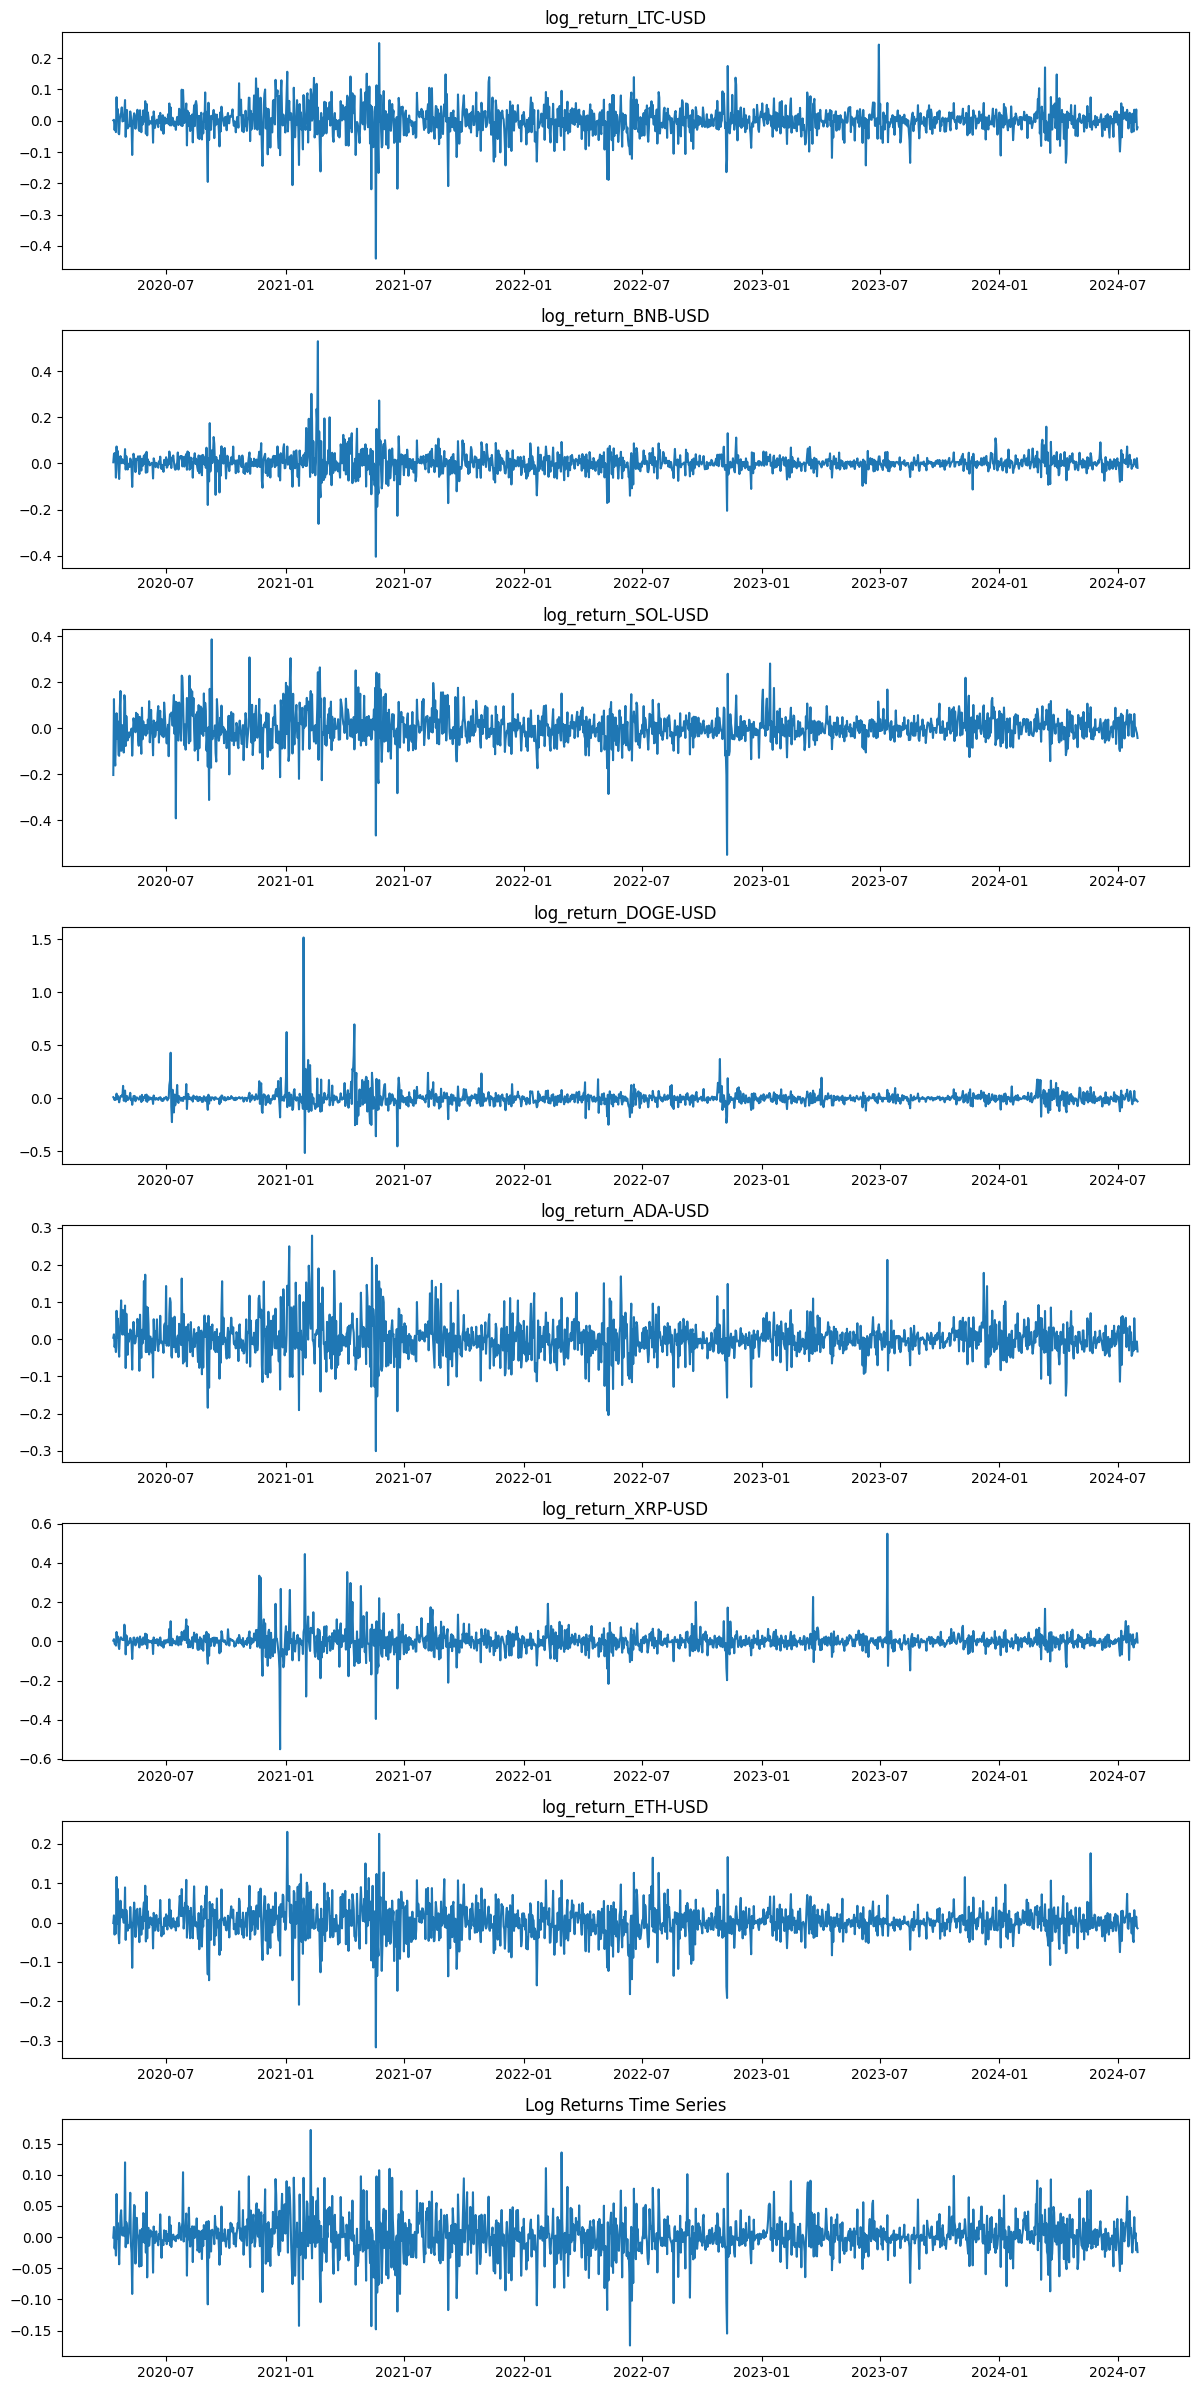

In [8]:
columns = preprocessed_df.loc[:, (preprocessed_df.columns.str.contains('log_return') & (~preprocessed_df.columns.str.contains('Date')))].columns
num_columns = len(columns)

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(12, 3*num_columns), sharex=True)

for i, col in enumerate(columns):
    axes[i].plot(preprocessed_df['Date'], preprocessed_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', which='both', labelbottom=True)

plt.tight_layout()
plt.title('Log Returns Time Series')
plt.show()

In [9]:
# Descriptive Statistics of the time series
descriptive = descriptive_statistics_function(preprocessed_df)
descriptive

,LTC-USD,BNB-USD,SOL-USD,DOGE-USD,ADA-USD,XRP-USD,ETH-USD,BTC-USD,log_return_LTC-USD,log_return_BNB-USD,log_return_SOL-USD,log_return_DOGE-USD,log_return_ADA-USD,log_return_XRP-USD,log_return_ETH-USD,log_return_BTC-USD
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0
mean,100.732338,297.117068,58.346455,0.105868,0.664239,0.55937,2010.836746,34447.658592,0.000322,0.002375,0.003304,0.002624,0.001564,0.000764,0.001917,0.001425
std,55.764522,174.917573,61.183908,0.092651,0.595879,0.279076,1103.337833,17259.37264,0.046458,0.045821,0.069426,0.076526,0.050288,0.055126,0.041911,0.032286
min,39.589069,13.804288,0.515273,0.00194,0.031863,0.17587,153.286896,6642.109863,-0.441189,-0.40445,-0.549582,-0.515118,-0.301233,-0.550503,-0.317459,-0.174053
25%,63.081509,221.680435,14.319933,0.060384,0.290012,0.374279,1310.447021,20485.273438,-0.020435,-0.015418,-0.032438,-0.023212,-0.023728,-0.019729,-0.016785,-0.013001
50%,82.068581,299.029938,31.433041,0.079267,0.439034,0.506401,1850.753418,30590.078125,0.001071,0.001483,0.000506,-0.000374,-0.000017,0.000491,0.001622,0.000694
75%,126.031158,401.621796,98.18573,0.144031,0.937341,0.644851,2922.732666,46458.117188,0.022495,0.020236,0.037546,0.020189,0.023336,0.019542,0.022325,0.016198
max,386.450775,710.46405,258.934326,0.684777,2.968239,1.839236,4812.087402,73083.5,0.248434,0.529218,0.387184,1.516328,0.279436,0.548555,0.230695,0.171821
skew,1.625127,0.030954,1.118811,1.729266,1.526907,1.306444,0.206106,0.376442,-0.710535,0.73488,-0.274733,5.901844,0.336631,0.705455,-0.340527,-0.156626
kurtosis,2.892577,-0.60012,0.07229,4.793031,1.860889,2.017873,-0.649556,-0.844461,8.279009,19.814385,6.577628,108.491815,3.791559,21.976161,5.27331,3.502129


In [10]:
create_adf_result_data_frame(preprocessed_df)


,log_return_LTC-USD,log_return_BNB-USD,log_return_DOGE-USD,log_return_ADA-USD,log_return_XRP-USD,log_return_ETH-USD,log_return_BTC-USD
ADF Test Statistic,-15.216732,-10.267424,-9.640624,-12.05068,-41.568615,-11.860535,-40.833258
p-value,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lags Used,7,9,15,8,0,9,0
Number of Observations Used,1565,1563,1557,1564,1572,1563,1572
Critical Values,"{'1%': -3.4345353407734733, '5%': -2.863388576...","{'1%': -3.4345407051300514, '5%': -2.863390943...","{'1%': -3.434556881024473, '5%': -2.8633980833...","{'1%': -3.4345380212339838, '5%': -2.863389759...","{'1%': -3.434516673193861, '5%': -2.8633803368...","{'1%': -3.4345407051300514, '5%': -2.863390943...","{'1%': -3.434516673193861, '5%': -2.8633803368..."
IC Best,-5096.666802,-5164.675671,-3572.90694,-4868.482367,-4562.862368,-5431.735128,-6235.49283
Check Null Hypothesis,Stationary,Stationary,Stationary,Stationary,Stationary,Stationary,Stationary


In [11]:
find_non_stationary_series(preprocessed_df)

All series are stationary at 5% significance level


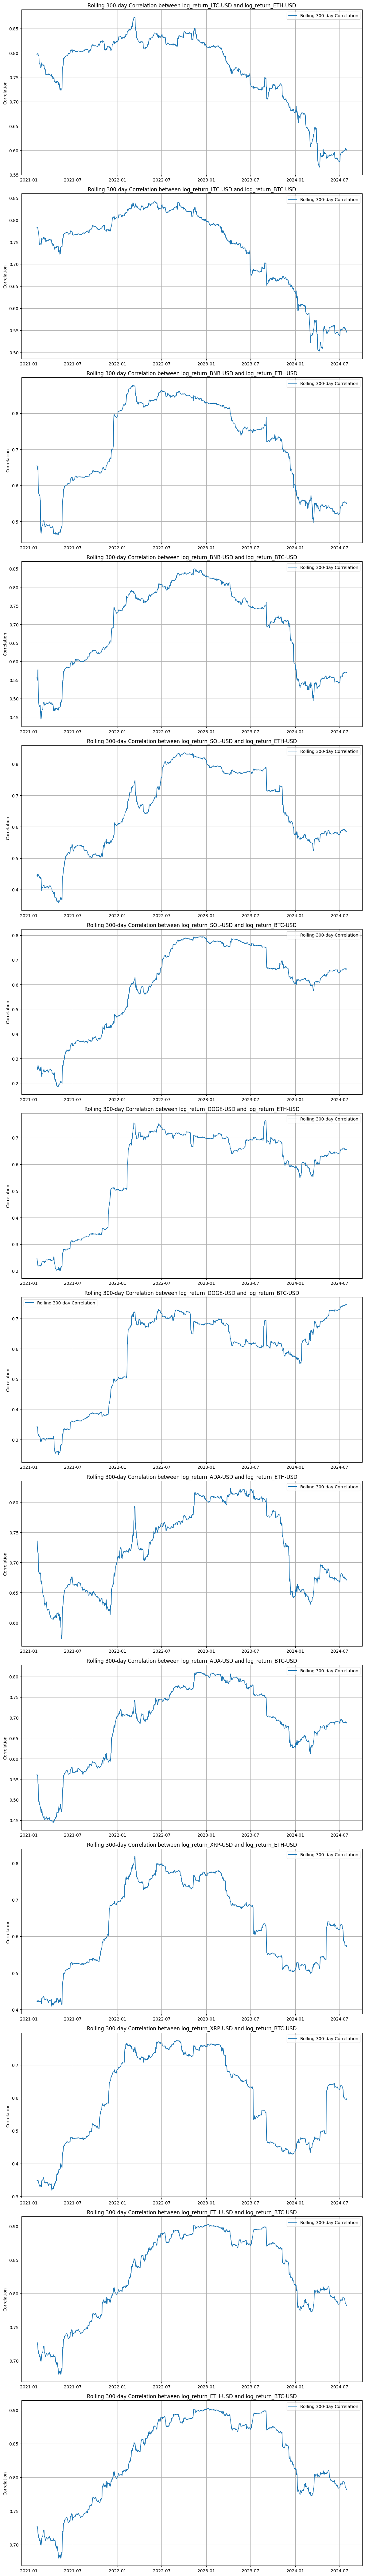

In [12]:
# Get all possible pairs of columns
columns = preprocessed_df.columns[preprocessed_df.columns.str.contains('log_return')]
pairs = list(itertools.combinations(columns, 2))
# Filter the pairs to only include the rolling_window_against columns
filtered_pairs = [pair for pair in pairs for against in rolling_window_against if against in pair]
# Plot the rolling correlation for each pair
fig, axes = plt.subplots(nrows=len(filtered_pairs), ncols=1, figsize=(12, 3*len(pairs)), sharex=True)

for i, (col1, col2) in enumerate(filtered_pairs):
    rolling_corr = preprocessed_df[[col1, col2]].rolling(window=window_size).corr().unstack()
    rolling_corr.dropna(inplace=True)
    if rolling_corr.columns[0][0] == rolling_corr.columns[0][1]:
        rolling_corr = rolling_corr.iloc[:,1]
    else:
        rolling_corr = rolling_corr.iloc[:,0]
    axes[i].plot(preprocessed_df['Date'][window_size-1:], rolling_corr, label=f'Rolling {window_size}-day Correlation')
    axes[i].set_title(f'Rolling {window_size}-day Correlation between {col1} and {col2}')
    axes[i].tick_params(axis='x', which='both', labelbottom=True)
    axes[i].set_ylabel('Correlation')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Perform the rolling style analysis
targets = []
for col in preprocessed_df.columns:
    if (col not in rolling_window_against and col != 'Date') and ('log_return' in col):
        targets.append(col)

solution_list = []
for target in targets:
    sol = rolling_style_analysis(data=preprocessed_df, index_columns=rolling_window_against, target_variable=target, window=window_size, step=1)
    solution_list.append(sol)

The Confidence Intervals are calculated based on the paper:

Angelo Lobosco & Dan DiBartolomeo (1997) Approximating the Confidence Intervals for Sharpe Style Weights, Financial Analysts Journal, 53:4, 80-85, DOI: 10.2469/ faj.v53.n4.2103

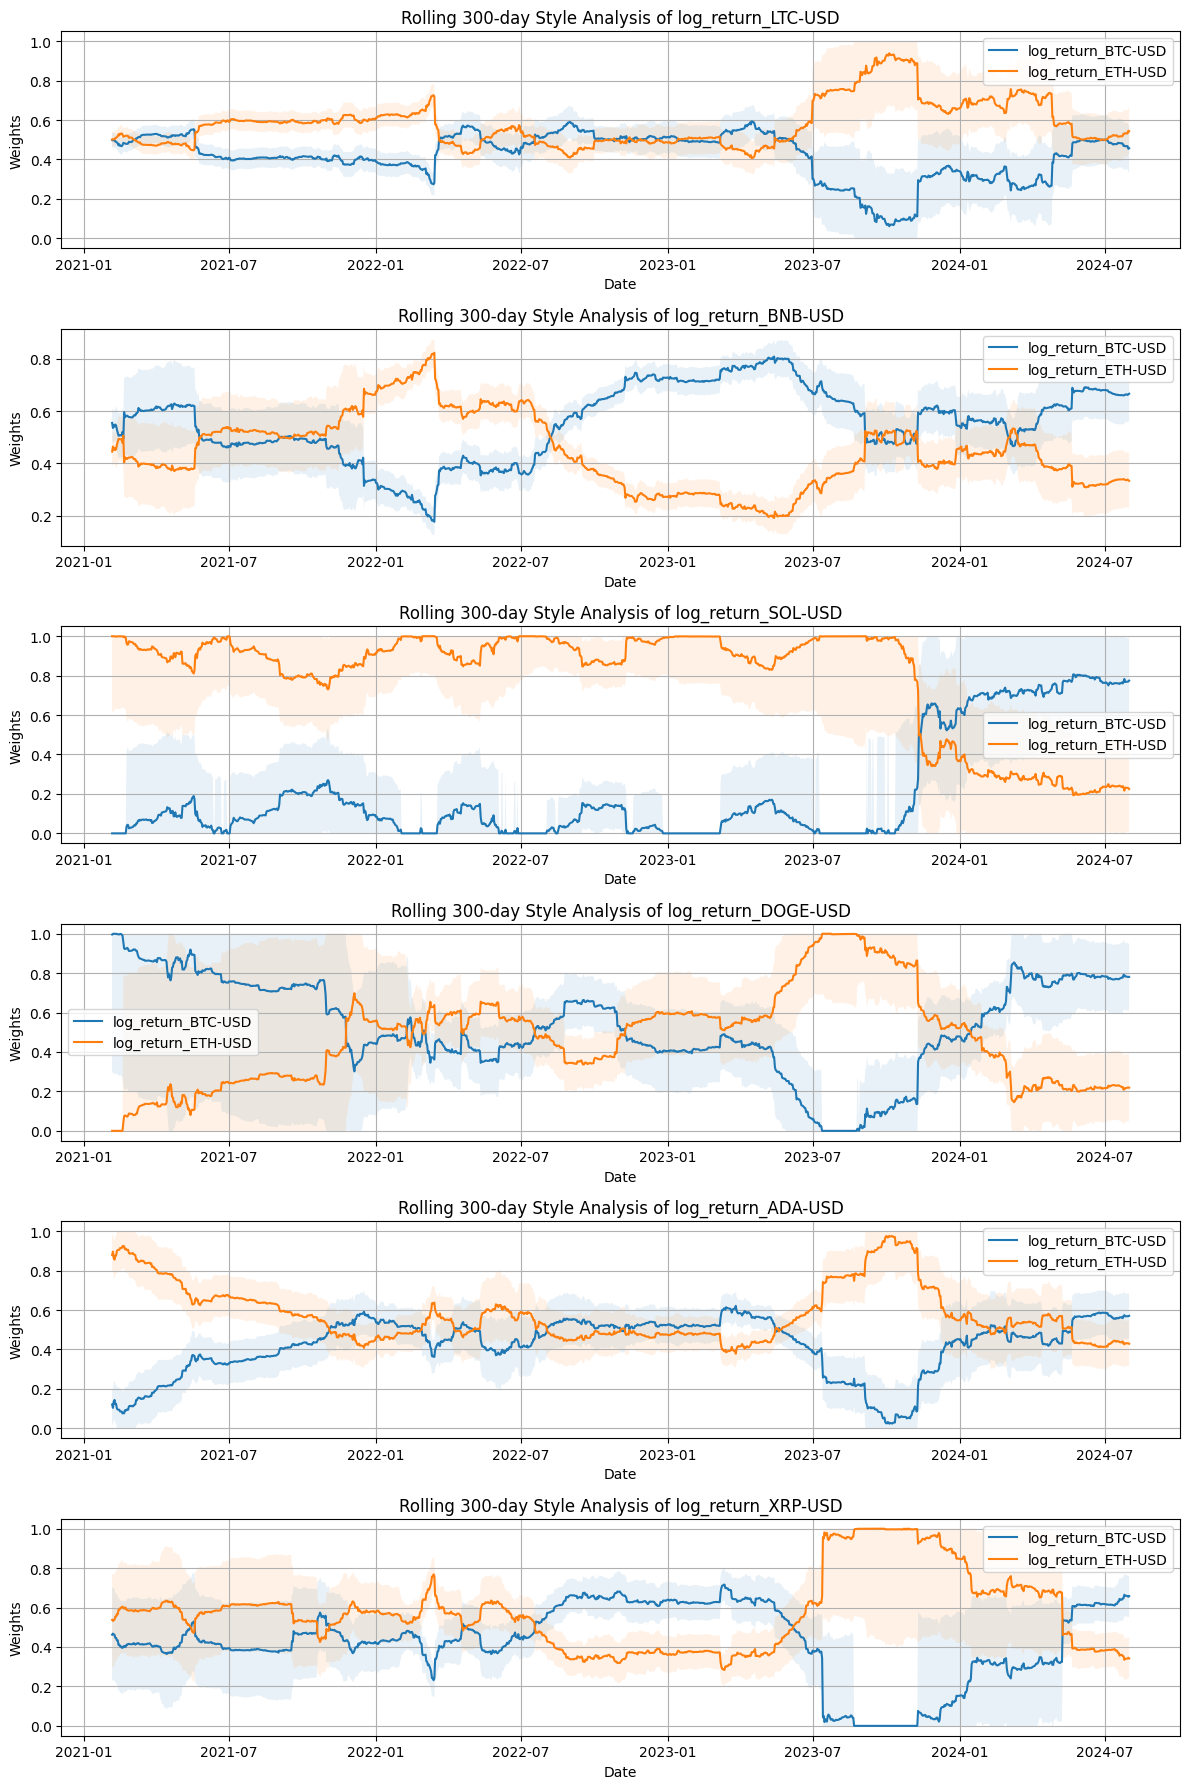

In [14]:
fig, axes = plt.subplots(nrows=len(targets), ncols=1, figsize=(12, 3*len(targets)), sharex=True)

for ix, sol in enumerate(solution_list): 
    columns = sol.loc[:, sol.columns.str.contains('coeff')].columns
    num_columns = len(columns)
    for i, col in enumerate(columns):
        x=sol.index
        y=sol[col]
        y_minus_ci = [sol[f'coeff_{i}'].iloc[ix] - sol[f'conf_interval_{i}'].iloc[ix] if sol[f'coeff_{i}'].iloc[ix] - sol[f'conf_interval_{i}'].iloc[ix] >= 0 else 0 for ix in sol.reset_index(drop=True).index]
        y_plus_ci = [sol[f'coeff_{i}'].iloc[ix] + sol[f'conf_interval_{i}'].iloc[ix] if sol[f'coeff_{i}'].iloc[ix] + sol[f'conf_interval_{i}'].iloc[ix] <= 1 else 1 for ix in sol.reset_index(drop=True).index]
        axes[ix].plot(x,y, label=rolling_window_against[i])
        axes[ix].fill_between(x, y_minus_ci, y_plus_ci, alpha=.1)
        axes[ix].set_title(f'Rolling {window_size}-day Style Analysis of {targets[ix]}')
        axes[ix].set_xlabel('Date')
        axes[ix].tick_params(axis='x', which='both', labelbottom=True)
        axes[ix].set_ylabel('Weights')
        axes[ix].legend()
        axes[ix].grid(True)
    
plt.tight_layout()
plt.legend()
plt.show()

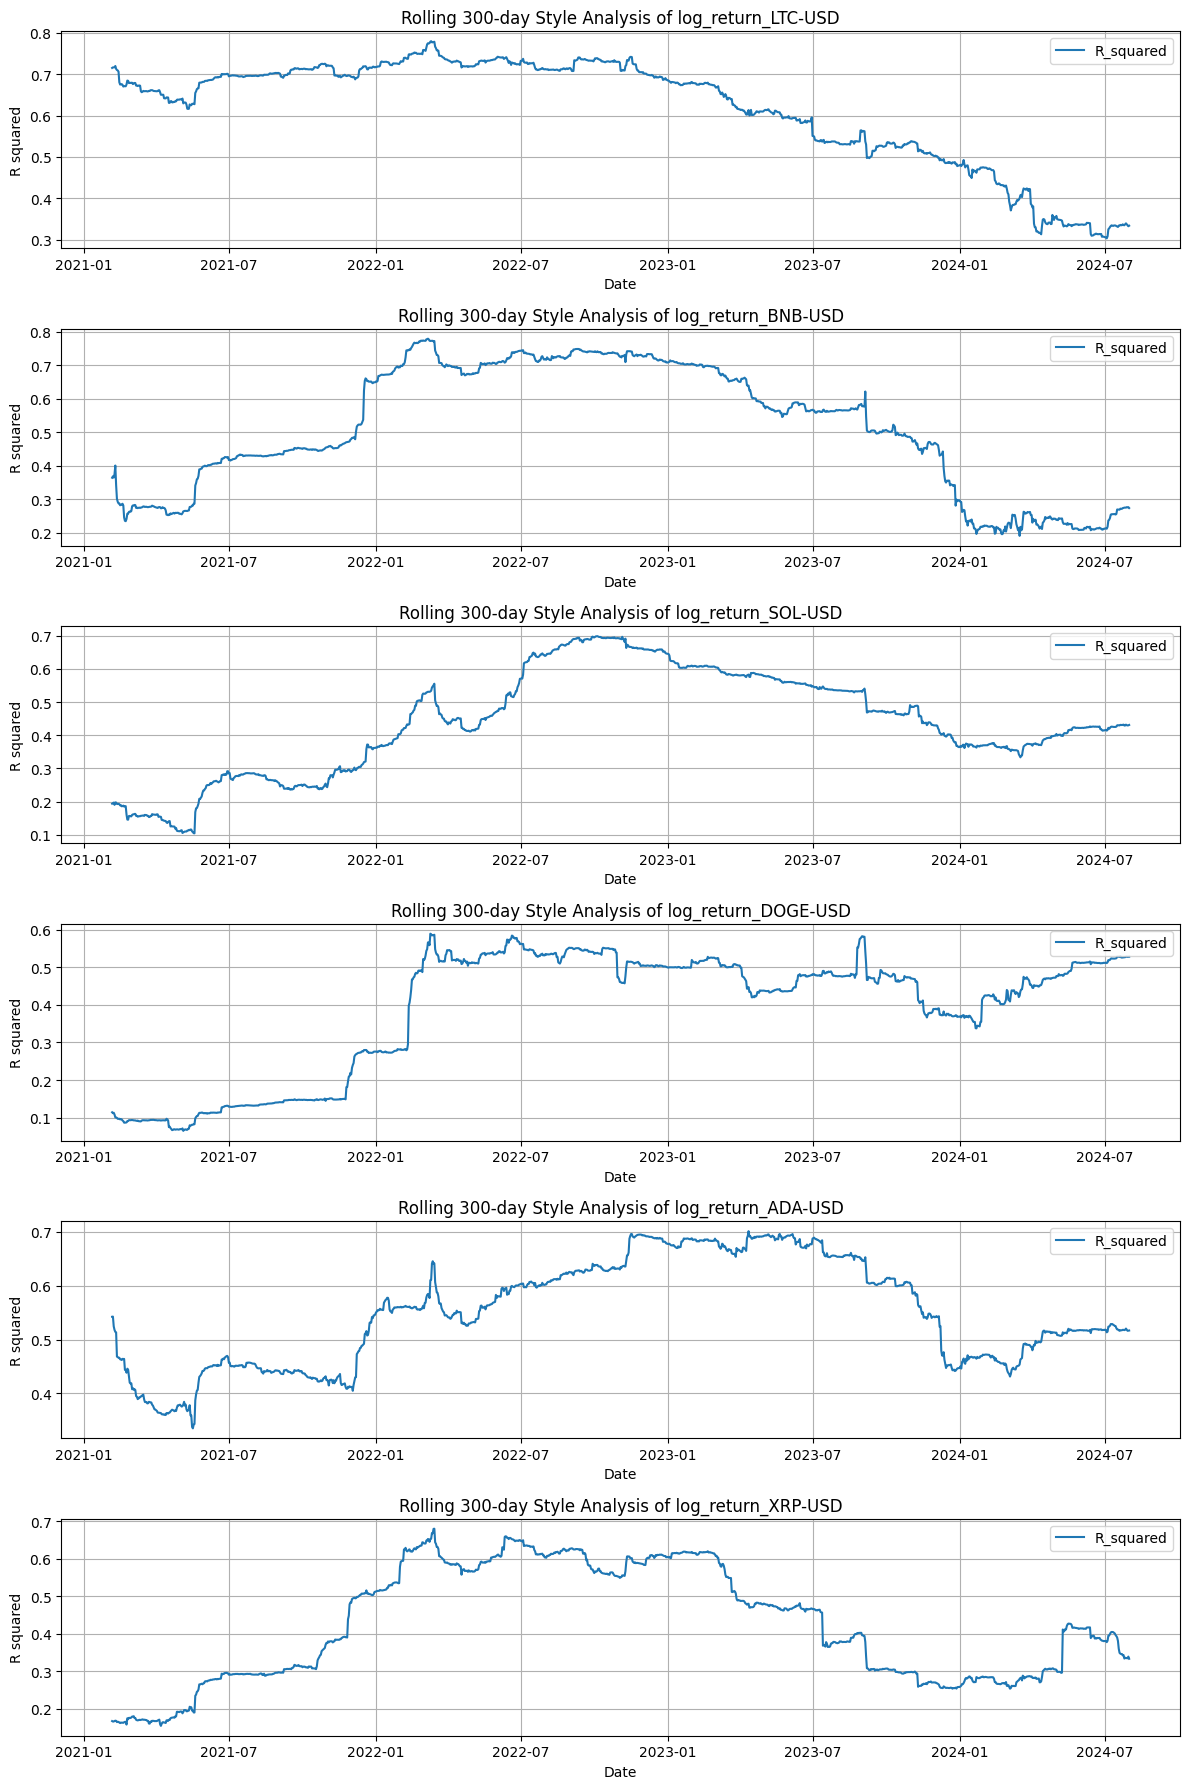

In [15]:
fig, axes = plt.subplots(nrows=len(targets), ncols=1, figsize=(12, 3*len(targets)), sharex=True)

for ix, sol in enumerate(solution_list):
    x = sol.index
    y = sol['R_squared']
    axes[ix].plot(x,y, label='R_squared')
    axes[ix].set_title(f'Rolling {window_size}-day Style Analysis of {targets[ix]}')
    axes[ix].set_xlabel('Date')
    axes[ix].tick_params(axis='x', which='both', labelbottom=True)
    axes[ix].set_ylabel('R squared')
    axes[ix].legend()
    axes[ix].grid(True)
    
plt.tight_layout()
plt.legend()
plt.show()